## module import

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#from prophet import Prophet

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

In [51]:
#!pip install --upgrade plotly

## data load

In [52]:
df = pd.read_csv('../피벗테이블화/시계열데이터.csv', index_col=0)
#df.index = df['시군구']
#df.drop(['시군구'] , axis=1 , inplace = True)
df

,시군구,201207,201208,201209,201210,201211,201212,201301,201302,201303,...,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206
0,서울특별시,56.160000,54.770000,54.590000,53.060000,52.470000,54.310000,55.580000,54.380000,54.130000,...,52.420000,52.910000,52.120000,54.150000,55.350000,54.780000,54.270000,52.740000,53.870000,55.130000
1,부산광역시,31.160000,33.750000,32.160000,29.270000,27.440000,29.190000,30.920000,30.660000,28.560000,...,32.470000,31.600000,29.930000,30.840000,32.510000,33.230000,30.490000,30.090000,30.710000,32.350000
2,대구광역시,29.650000,32.040000,30.530000,27.780000,26.630000,28.400000,29.670000,29.870000,27.430000,...,30.760000,30.080000,28.460000,30.060000,31.860000,32.030000,29.720000,28.780000,29.270000,31.230000
3,인천광역시,23.080000,25.030000,23.210000,20.550000,20.250000,22.320000,23.730000,23.960000,21.440000,...,26.020000,24.630000,24.090000,25.400000,27.260000,28.300000,25.080000,23.970000,23.850000,26.240000
4,광주광역시,33.440000,35.550000,34.250000,33.030000,31.040000,31.920000,34.360000,34.550000,31.870000,...,34.550000,33.500000,31.520000,32.580000,34.630000,35.290000,33.040000,32.140000,32.270000,34.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,의령군,9.356462,10.998588,10.074215,8.781770,9.104863,9.834543,10.062800,10.529285,9.395696,...,14.675576,14.185667,13.604798,13.716445,13.798466,14.206236,13.230215,13.558505,12.886080,13.218581
105,함안군,4.217883,5.835179,4.591603,3.875660,3.993740,4.344711,4.837138,5.112820,3.934685,...,5.294509,5.032166,4.497449,4.760096,5.226206,5.441316,4.253452,4.269901,4.228233,4.775599
106,창녕군,19.483865,21.378417,19.304198,18.925415,16.456108,15.590491,15.512308,14.754685,15.252023,...,14.001607,13.372163,12.163713,12.276786,12.560260,13.329217,12.363098,12.171694,13.451149,13.087783
107,고성군,31.119688,34.504349,30.376161,28.107904,26.478927,25.881949,25.583604,25.660858,25.422292,...,30.367887,30.125214,28.606246,29.865938,29.891701,30.700646,28.936219,28.265647,29.146661,30.490865


In [53]:
df_tr = df.transpose()
df_tr

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
시군구,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,수원시,성남시,...,진주시,사천시,김해시,밀양시,양산시,의령군,함안군,창녕군,고성군,산청군
201207,56.16,31.16,29.65,23.08,33.44,36.8,6.24,NaN,51.618451,49.939383,...,27.78733,16.646989,16.835896,19.689237,14.206654,9.356462,4.217883,19.483865,31.119688,24.698464
201208,54.77,33.75,32.04,25.03,35.55,38.28,7.76,NaN,50.672225,48.886304,...,30.229363,19.446594,19.927316,22.620756,17.016334,10.998588,5.835179,21.378417,34.504349,26.331679
201209,54.59,32.16,30.53,23.21,34.25,36.8,6.98,NaN,49.938929,48.661787,...,28.897252,18.417324,18.155057,20.88507,15.424764,10.074215,4.591603,19.304198,30.376161,24.297954
201210,53.06,29.27,27.78,20.55,33.03,34.04,5.54,NaN,48.060045,46.559391,...,29.996294,16.062954,15.908561,18.05453,13.529512,8.78177,3.87566,18.925415,28.107904,22.554195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202202,54.78,33.23,32.03,28.3,35.29,39.89,7.23,23.684805,52.396565,52.954217,...,23.504934,19.555694,19.247693,15.770793,19.438683,14.206236,5.441316,13.329217,30.700646,19.850045
202203,54.27,30.49,29.72,25.08,33.04,38.06,5.93,21.45005,51.771823,52.528966,...,23.228709,17.345462,17.757267,15.107572,17.595224,13.230215,4.253452,12.363098,28.936219,19.58382
202204,52.74,30.09,28.78,23.97,32.14,37.14,6.01,20.245838,50.374499,52.011542,...,24.013788,17.429221,17.684249,16.175311,17.105558,13.558505,4.269901,12.171694,28.265647,20.467382
202205,53.87,30.71,29.27,23.85,32.27,37.83,5.72,20.758075,51.943399,52.961751,...,26.500313,16.661584,18.625226,18.016137,17.482123,12.88608,4.228233,13.451149,29.146661,20.59088


In [54]:
df_tr.rename(columns=df_tr.iloc[0] , inplace =True)
df_tr = df_tr.drop(df_tr.index[0])
df_tr

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,수원시,성남시,...,진주시,사천시,김해시,밀양시,양산시,의령군,함안군,창녕군,고성군,산청군
201207,56.16,31.16,29.65,23.08,33.44,36.8,6.24,NaN,51.618451,49.939383,...,27.78733,16.646989,16.835896,19.689237,14.206654,9.356462,4.217883,19.483865,31.119688,24.698464
201208,54.77,33.75,32.04,25.03,35.55,38.28,7.76,NaN,50.672225,48.886304,...,30.229363,19.446594,19.927316,22.620756,17.016334,10.998588,5.835179,21.378417,34.504349,26.331679
201209,54.59,32.16,30.53,23.21,34.25,36.8,6.98,NaN,49.938929,48.661787,...,28.897252,18.417324,18.155057,20.88507,15.424764,10.074215,4.591603,19.304198,30.376161,24.297954
201210,53.06,29.27,27.78,20.55,33.03,34.04,5.54,NaN,48.060045,46.559391,...,29.996294,16.062954,15.908561,18.05453,13.529512,8.78177,3.87566,18.925415,28.107904,22.554195
201211,52.47,27.44,26.63,20.25,31.04,33.3,5.87,NaN,47.614087,46.064991,...,26.579561,15.951604,14.776806,16.684406,13.223293,9.104863,3.99374,16.456108,26.478927,19.320396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202202,54.78,33.23,32.03,28.3,35.29,39.89,7.23,23.684805,52.396565,52.954217,...,23.504934,19.555694,19.247693,15.770793,19.438683,14.206236,5.441316,13.329217,30.700646,19.850045
202203,54.27,30.49,29.72,25.08,33.04,38.06,5.93,21.45005,51.771823,52.528966,...,23.228709,17.345462,17.757267,15.107572,17.595224,13.230215,4.253452,12.363098,28.936219,19.58382
202204,52.74,30.09,28.78,23.97,32.14,37.14,6.01,20.245838,50.374499,52.011542,...,24.013788,17.429221,17.684249,16.175311,17.105558,13.558505,4.269901,12.171694,28.265647,20.467382
202205,53.87,30.71,29.27,23.85,32.27,37.83,5.72,20.758075,51.943399,52.961751,...,26.500313,16.661584,18.625226,18.016137,17.482123,12.88608,4.228233,13.451149,29.146661,20.59088


## 시각화

<AxesSubplot:>

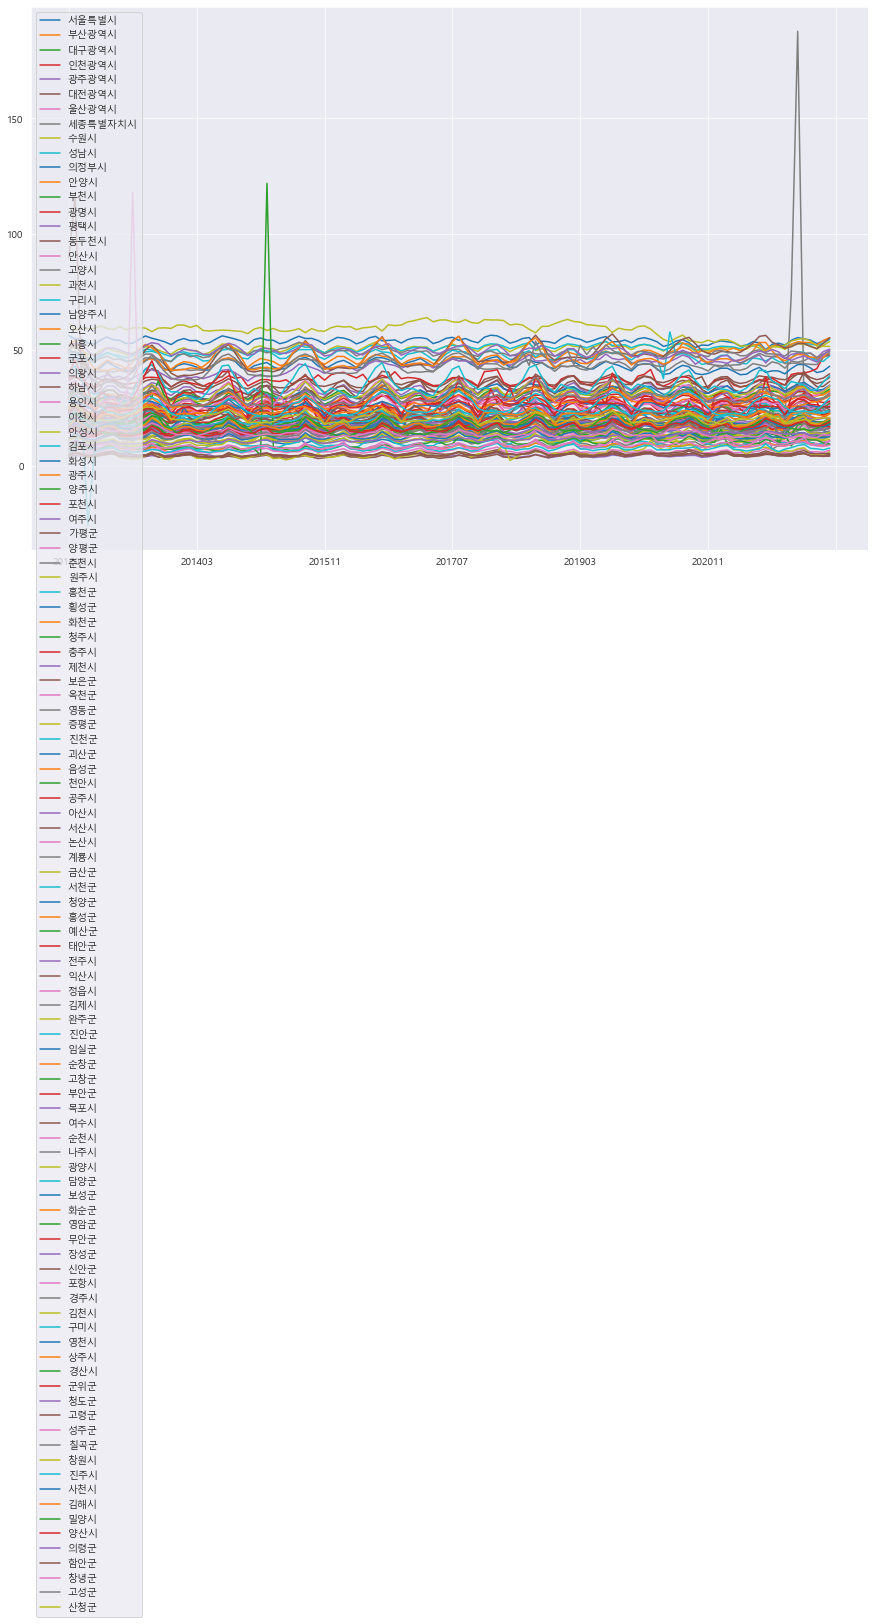

In [55]:
# 이상치 발견
df_tr.plot(figsize=(15,10))

## 전산 오류 지역 평균 대치

In [56]:
df_mean = df_tr.copy()
df_mean.loc[['201209', '201210'], '구미시'] = np.nan
df_mean.loc[['202010', '202011'], '대전광역시'] = np.nan
df_mean.loc[['201207', '201208'], '동두천시'] = np.nan
df_mean.loc[['202112', '202201'], '세종특별자치시'] = np.nan
df_mean.loc[['201501', '201502'], '영암군'] = np.nan
df_mean.loc[['201304', '201305'], '옥천군'] = np.nan

In [57]:
date = ['201207', '201208',
        '201209', '201210',
        '201304', '201305',
        '201501', '201502',
        '202010', '202011',
        '202112', '202201']
area = ['동두천시', '구미시',
     '옥천군', '영암군', '대전광역시', '세종특별자치시']
df_mean.loc[date,area]

,동두천시,구미시,옥천군,영암군,대전광역시,세종특별자치시
201207,NaN,6.036277,14.623788,7.027559,36.8,NaN
201208,NaN,6.894142,16.608676,8.927554,38.28,NaN
201209,37.725056,NaN,15.216355,8.099507,36.8,NaN
201210,43.843103,NaN,13.769124,6.989013,34.04,NaN
201304,33.871061,6.233389,NaN,8.204943,33.63,12.508682
201305,33.303516,5.623505,NaN,7.669784,33.22,11.645243
201501,33.310275,8.295311,15.19636,NaN,35.82,16.856219
201502,34.685593,8.620238,15.549731,NaN,36.34,16.91747
202010,32.92571,6.777102,14.751887,10.551571,NaN,19.744081
202011,31.401989,6.980071,15.059283,10.546714,NaN,19.267591


In [58]:
df_mean = df_mean.reset_index()
df_mean['month'] = df_mean['index'].apply(lambda x : x[-2:])
df_mean = df_mean.groupby('month').mean()
df_mean

,index,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,수원시,...,진주시,사천시,김해시,밀양시,양산시,의령군,함안군,창녕군,고성군,산청군
month,,,,,,,,,,,,,,,,,,,,,
01,2.013012e+58,55.335,31.478,30.680,25.004,34.525,37.163000,6.848,19.083189,51.720282,...,22.660332,18.283180,18.222140,14.197616,16.883490,11.671725,5.062943,13.150946,28.365821,18.996538
02,2.013022e+58,54.718,31.797,30.851,25.745,35.028,37.569000,7.316,19.937317,51.120999,...,22.739384,19.018557,18.237944,14.343237,17.409731,12.146677,5.291574,13.431523,28.520240,19.352866
03,2.013032e+58,54.178,29.458,28.203,22.877,32.525,35.388000,5.970,17.702729,50.724012,...,22.405293,16.680823,16.747780,13.780004,15.159623,11.328962,4.233249,12.893690,27.520900,19.460871
04,2.013042e+58,52.539,28.822,27.362,22.091,31.767,34.722000,5.965,16.934734,49.234745,...,23.027733,16.723865,16.446278,14.896336,15.094768,11.644518,4.270736,13.127365,27.485563,20.741455
05,2.013052e+58,53.260,29.352,27.890,21.593,31.778,34.868000,5.542,16.834535,50.381094,...,24.842054,16.148895,17.240126,16.453812,15.153919,11.333242,4.134082,13.971214,28.538703,21.129141
06,2.013062e+58,54.692,30.772,29.525,23.345,33.170,36.416000,6.083,17.851096,51.839164,...,27.709367,16.790436,18.432467,18.560572,15.832527,11.649471,4.492923,14.290664,30.429430,21.401119
07,2.012072e+58,55.414,32.002,30.453,24.363,33.895,37.444000,6.264,18.545636,52.614001,...,29.146122,17.222104,19.192915,19.397394,16.026448,11.346849,4.746750,14.791262,32.546166,22.858585
08,2.012082e+58,53.701,34.085,32.268,25.873,35.859,38.233000,7.391,19.764964,51.143089,...,30.915819,19.863001,21.736017,21.656825,18.496356,12.552886,5.947069,16.560294,35.232668,23.965367
09,2.012092e+58,53.851,32.394,30.675,24.837,34.747,37.478000,6.762,18.481858,50.773193,...,29.693996,18.945860,19.620132,20.605375,17.057914,12.133750,5.081377,15.596623,32.345227,22.349883


In [59]:
df_tr.loc['201209', '구미시'] = df_mean.loc['09', '구미시']
df_tr.loc['201210', '구미시'] = df_mean.loc['10', '구미시']
df_tr.loc['202010', '대전광역시'] = df_mean.loc['10', '대전광역시']
df_tr.loc['202011', '대전광역시'] = df_mean.loc['11', '대전광역시']
df_tr.loc['201207', '동두천시'] = df_mean.loc['07', '동두천시']
df_tr.loc['201208', '동두천시'] = df_mean.loc['08', '동두천시']
df_tr.loc['202112', '세종특별자치시'] = df_mean.loc['12', '세종특별자치시']
df_tr.loc['202201', '세종특별자치시'] = df_mean.loc['01', '세종특별자치시']
df_tr.loc['201501', '영암군'] = df_mean.loc['01', '영암군']
df_tr.loc['201502', '영암군'] = df_mean.loc['02', '영암군']
df_tr.loc['201304', '옥천군'] = df_mean.loc['04', '옥천군']
df_tr.loc['201305', '옥천군'] = df_mean.loc['05', '옥천군']

In [60]:
df_tr.loc[date,area]

,동두천시,구미시,옥천군,영암군,대전광역시,세종특별자치시
201207,36.675671,6.036277,14.623788,7.027559,36.8,NaN
201208,39.503451,6.894142,16.608676,8.927554,38.28,NaN
201209,37.725056,7.351968,15.216355,8.099507,36.8,NaN
201210,43.843103,6.20721,13.769124,6.989013,34.04,NaN
201304,33.871061,6.233389,14.514392,8.204943,33.63,12.508682
201305,33.303516,5.623505,13.966829,7.669784,33.22,11.645243
201501,33.310275,8.295311,15.19636,10.681456,35.82,16.856219
201502,34.685593,8.620238,15.549731,10.606474,36.34,16.91747
202010,32.92571,6.777102,14.751887,10.551571,35.153333,19.744081
202011,31.401989,6.980071,15.059283,10.546714,34.481111,19.267591


<AxesSubplot:>

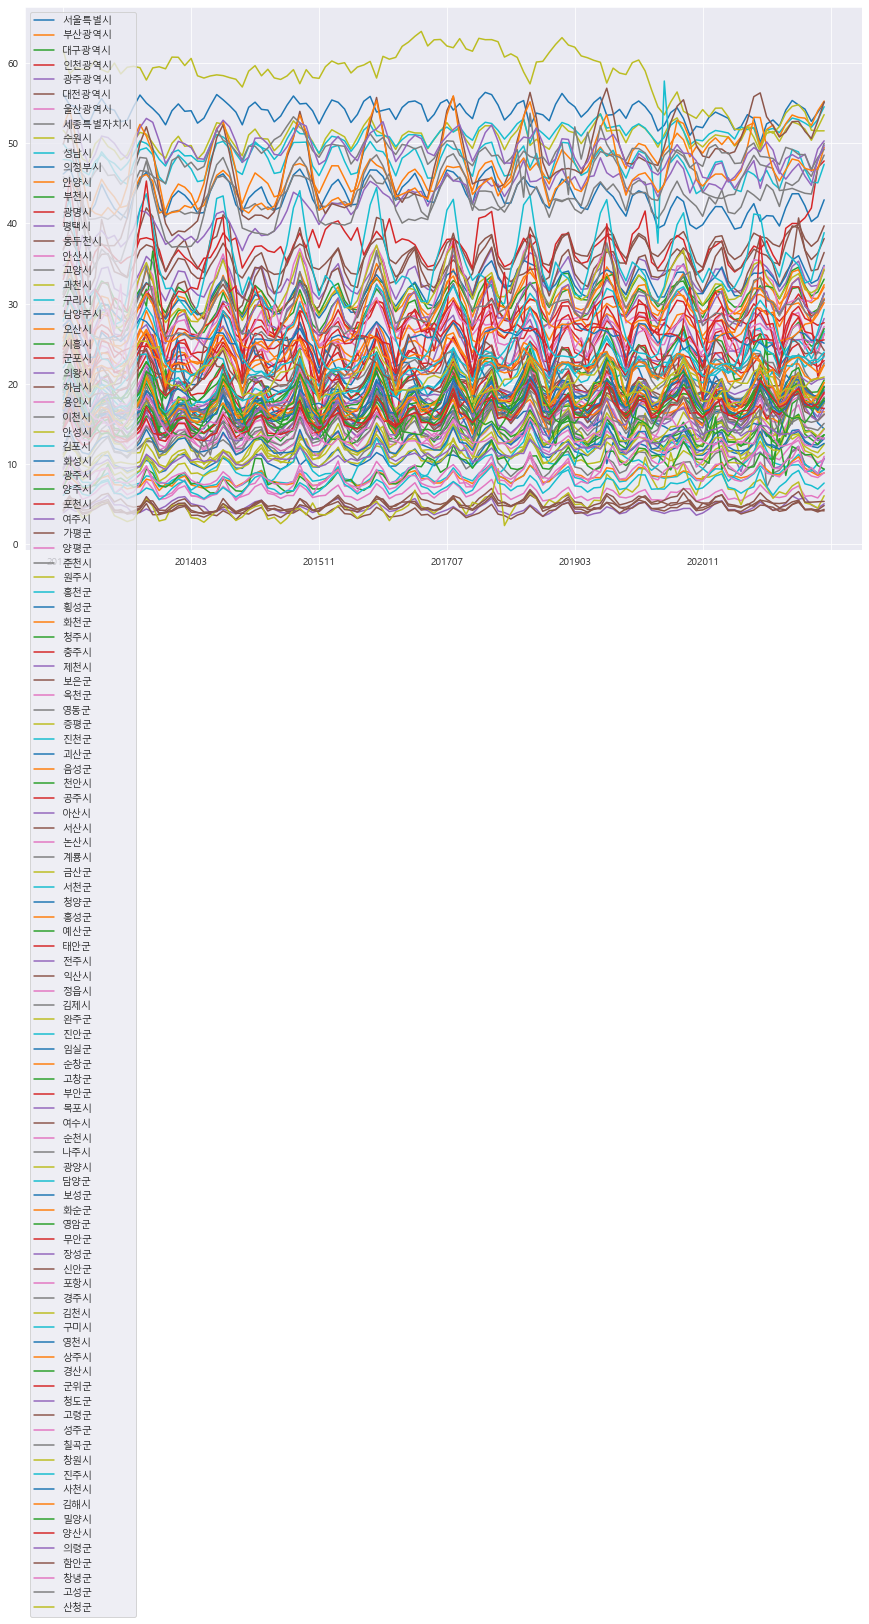

In [61]:
df_tr.plot(figsize=(15,10))

## 파라미터 튜닝
- 9년 train, 1년 test -> RMSE

In [62]:
from prophet import Prophet


def prophet_tuning(df, area):
    data = pd.DataFrame(df.loc[:,area])
    data = data.reset_index().rename(columns={'index':'ds',area:'y'})
    data['ds'] = data['ds'].astype('str') + '01'
    data['ds'] = pd.to_datetime(data['ds'], format='%Y%m%d')
    
    train = data.iloc[:108]
    test = data.iloc[108:]
    
    model =  Prophet(changepoint_prior_scale = 0.01,
                     seasonality_prior_scale = 5,
                     holidays_prior_scale = 0.01,
                     seasonality_mode = 'multiplicative',
                     growth = 'linear') 
    model.fit(train)
    
    test_date = pd.DataFrame(test['ds'])
    test_forecast = model.predict(test_date)

    test_res = pd.merge(test, test_forecast[['ds','yhat']], how='outer')
    test_res.set_index('ds',inplace=True)

    #test_res.plot()
    #plt.title(area)
    #plt.show()
    
    global rmse_all
    rmse_all = pd.concat([rmse_all, test_res])

In [63]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'seasonality_prior_scale':[3,5,7],
               'changepoint_prior_scale':[0.01,0.02,0.03],
               'holidays_prior_scale':[0.01,0.02,0.03]}
grid = ParameterGrid(params_grid)

In [64]:
rmse_all = pd.DataFrame(columns=['y', 'yhat'])
model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])

In [26]:
for p in grid:
    for area in df_tr.columns:
        prophet_tuning(df_tr, area)
    
    RMSE = np.sqrt(mean_squared_error(rmse_all['y'], rmse_all['yhat']))
    model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)

10:33:51 - cmdstanpy - INFO - Chain [1] start processing
10:33:51 - cmdstanpy - INFO - Chain [1] done processing
10:33:52 - cmdstanpy - INFO - Chain [1] start processing
10:33:52 - cmdstanpy - INFO - Chain [1] done processing
10:33:53 - cmdstanpy - INFO - Chain [1] start processing
10:33:53 - cmdstanpy - INFO - Chain [1] done processing
10:33:54 - cmdstanpy - INFO - Chain [1] start processing
10:33:54 - cmdstanpy - INFO - Chain [1] done processing
10:33:55 - cmdstanpy - INFO - Chain [1] start processing
10:33:55 - cmdstanpy - INFO - Chain [1] done processing
10:33:56 - cmdstanpy - INFO - Chain [1] start processing
10:33:56 - cmdstanpy - INFO - Chain [1] done processing
10:33:57 - cmdstanpy - INFO - Chain [1] start processing
10:33:57 - cmdstanpy - INFO - Chain [1] done processing
10:33:58 - cmdstanpy - INFO - Chain [1] start processing
10:33:58 - cmdstanpy - INFO - Chain [1] done processing
10:33:59 - cmdstanpy - INFO - Chain [1] start processing
10:33:59 - cmdstanpy - INFO - Chain [1]

KeyboardInterrupt: 

In [65]:
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,RMSE,Parameters


In [66]:
parameters['Parameters'][0]

KeyError: 0

## 최종모델로 미래 예측

In [67]:
df_year = df_tr.copy().reset_index()

i = 0
for j in range(0,120,12):
    df_year.loc[j:j+12,"year"] = i
    i = i + 1

In [68]:
all_mean = pd.DataFrame(df_tr.mean()).rename(columns={0:'10년평균(과거)'})
year_mean = pd.DataFrame(df_year.groupby('year').mean().max()).rename(columns={0:'연평균최대'})
result = all_mean.join(year_mean)
result["1년평균(예측)"] = np.nan
result

,10년평균(과거),연평균최대,1년평균(예측)
서울특별시,54.015833,54.644167,NaN
부산광역시,30.757667,31.674167,NaN
대구광역시,29.371917,30.454167,NaN
인천광역시,23.603833,25.573333,NaN
광주광역시,33.296833,34.371667,NaN
...,...,...,...
의령군,11.590939,14.103411,NaN
함안군,4.709984,4.968177,NaN
창녕군,14.044940,16.922315,NaN
고성군,29.702160,31.861863,NaN


In [69]:
def prophet_prediction(df, area):
    data = pd.DataFrame(df.loc[:,area])
    data = data.reset_index().rename(columns={'index':'ds',area:'y'})
    data['ds'] = data['ds'].astype('str') + '01'
    data['ds'] = pd.to_datetime(data['ds'], format='%Y%m%d')
    
    model =  Prophet(changepoint_prior_scale = 0.01,
                     holidays_prior_scale = 0.03,
                     seasonality_mode = 'multiplicative',
                     seasonality_prior_scale = 5) 
    model.fit(data)
    
    forecast_date = pd.DataFrame(pd.date_range(start="2022-07-01", end="2023-07-01", freq="M"))
    forecast_date = forecast_date.rename(columns={0:'ds'})
    forecast = model.predict(forecast_date)

    result.loc[area, '1년평균(예측)'] = np.mean(forecast['yhat'])

In [70]:
for area in df_tr.columns:
    prophet_prediction(df_tr, area)

10:41:03 - cmdstanpy - INFO - Chain [1] start processing
10:41:03 - cmdstanpy - INFO - Chain [1] done processing
10:41:04 - cmdstanpy - INFO - Chain [1] start processing
10:41:04 - cmdstanpy - INFO - Chain [1] done processing
10:41:05 - cmdstanpy - INFO - Chain [1] start processing
10:41:05 - cmdstanpy - INFO - Chain [1] done processing
10:41:06 - cmdstanpy - INFO - Chain [1] start processing
10:41:06 - cmdstanpy - INFO - Chain [1] done processing
10:41:06 - cmdstanpy - INFO - Chain [1] start processing
10:41:06 - cmdstanpy - INFO - Chain [1] done processing
10:41:07 - cmdstanpy - INFO - Chain [1] start processing
10:41:07 - cmdstanpy - INFO - Chain [1] done processing
10:41:08 - cmdstanpy - INFO - Chain [1] start processing
10:41:08 - cmdstanpy - INFO - Chain [1] done processing
10:41:09 - cmdstanpy - INFO - Chain [1] start processing
10:41:09 - cmdstanpy - INFO - Chain [1] done processing
10:41:10 - cmdstanpy - INFO - Chain [1] start processing
10:41:10 - cmdstanpy - INFO - Chain [1]

In [71]:
result

,10년평균(과거),연평균최대,1년평균(예측)
서울특별시,54.015833,54.644167,52.982867
부산광역시,30.757667,31.674167,31.533150
대구광역시,29.371917,30.454167,30.952090
인천광역시,23.603833,25.573333,26.034935
광주광역시,33.296833,34.371667,33.748349
...,...,...,...
의령군,11.590939,14.103411,14.486219
함안군,4.709984,4.968177,5.045623
창녕군,14.044940,16.922315,12.865986
고성군,29.702160,31.861863,30.589709


In [72]:
result["감소추이"] = result['연평균최대'] - result['1년평균(예측)']
result

,10년평균(과거),연평균최대,1년평균(예측),감소추이
서울특별시,54.015833,54.644167,52.982867,1.661300
부산광역시,30.757667,31.674167,31.533150,0.141017
대구광역시,29.371917,30.454167,30.952090,-0.497924
인천광역시,23.603833,25.573333,26.034935,-0.461602
광주광역시,33.296833,34.371667,33.748349,0.623318
...,...,...,...,...
의령군,11.590939,14.103411,14.486219,-0.382808
함안군,4.709984,4.968177,5.045623,-0.077446
창녕군,14.044940,16.922315,12.865986,4.056329
고성군,29.702160,31.861863,30.589709,1.272153


In [73]:
result.sort_values(by=['감소추이'], ascending=False)

,10년평균(과거),연평균최대,1년평균(예측),감소추이
과천시,58.468422,62.068571,49.427102,12.641469
태안군,27.916893,34.158586,24.565466,9.593120
청주시,14.914256,18.906489,12.198474,6.708015
횡성군,21.255471,24.696709,18.605660,6.091049
평택시,14.339019,16.564055,10.905009,5.659046
...,...,...,...,...
담양군,20.945063,23.758968,24.805737,-1.046769
춘천시,43.495493,45.771257,46.892959,-1.121702
하남시,33.573000,36.869494,38.041895,-1.172400
안양시,46.909334,52.587885,53.957664,-1.369779


In [74]:
result.sort_values(by=['감소추이'], ascending=False).head(20)

,10년평균(과거),연평균최대,1년평균(예측),감소추이
과천시,58.468422,62.068571,49.427102,12.641469
태안군,27.916893,34.158586,24.565466,9.593120
청주시,14.914256,18.906489,12.198474,6.708015
횡성군,21.255471,24.696709,18.605660,6.091049
평택시,14.339019,16.564055,10.905009,5.659046
예산군,15.267302,17.621672,12.898400,4.723272
의정부시,43.259295,44.839195,40.493790,4.345405
창녕군,14.044940,16.922315,12.865986,4.056329
목포시,49.286970,50.138658,46.781346,3.357312
이천시,11.096416,12.524067,9.402522,3.121545


In [76]:
result.reset_index()[['index','감소추이']].to_csv("일반용비율_예측값.csv", encoding='utf-8-sig')